# Проект Яндекс.Афиша

Цель: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Задачи узнать:
 - как клиенты пользуются сервисом,
 - когда делают первые покупки на сайте,
 - сколько денег приносит компании каждый клиент,
 - когда расходы на привлечение клиента окупаются.

## Шаг 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
visits = pd.read_csv('/datasets/visits_log.csv', sep=',')
orders = pd.read_csv('/datasets/orders_log.csv', sep=',')
costs = pd.read_csv('/datasets/costs.csv', sep=',')

In [4]:
visits.sample(n = 10, random_state=1)

,Device,End Ts,Source Id,Start Ts,Uid
167589,desktop,2018-01-15 21:12:00,10,2018-01-15 21:06:00,11898993694310850933
299103,desktop,2018-05-09 01:21:00,4,2018-05-09 01:21:00,7218061394456444803
345632,desktop,2018-02-18 20:17:00,3,2018-02-18 20:12:00,5663226520415784959
91779,touch,2018-05-14 16:08:00,4,2018-05-14 16:07:00,10927064994254891814
272577,desktop,2017-12-25 12:34:00,1,2017-12-25 12:15:00,14081765519052754461
117058,desktop,2018-03-25 22:45:00,3,2018-03-25 22:42:00,18134900845074462797
67173,desktop,2017-12-03 21:15:00,4,2017-12-03 21:04:00,2597938318978185937
348213,touch,2017-12-01 11:01:00,1,2017-12-01 10:24:00,5806545115681005098
245510,desktop,2018-04-28 14:11:00,5,2018-04-28 14:08:00,1209933333956484517
124505,desktop,2017-10-20 09:35:00,3,2017-10-20 09:28:00,15136031684291427312


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Колонки End Ts и Start Ts в формате object.

In [6]:
orders.sample(n = 10, random_state=1)

,Buy Ts,Revenue,Uid
7271,2017-09-09 01:29:00,1.10,7674233352595996409
36523,2018-02-23 08:56:00,1.71,8129244829733440960
41828,2018-03-25 16:47:00,1.22,9003018755281849036
39266,2018-03-10 11:51:00,4.28,775704491445963998
10615,2017-10-04 17:31:00,4.58,5139615590553126732
39590,2018-03-12 14:37:00,1.54,17322829838415263008
33831,2018-02-09 22:36:00,2.44,6917790636196771579
8441,2017-09-20 20:11:00,1.34,4195018562480487182
35611,2018-02-18 23:27:00,0.85,17082801536003975717
12989,2017-10-16 10:18:00,1.83,8787007543901122020


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Колонка Buy Ts в формате object.

In [8]:
costs.sample(n = 10, random_state=1)

,source_id,dt,costs
1481,5,2017-06-30,77.88
1833,9,2017-06-18,9.44
2045,9,2018-01-16,13.90
1785,5,2018-05-01,79.99
1402,4,2018-04-12,160.14
705,2,2018-05-11,82.25
297,1,2018-03-25,87.70
1246,4,2017-11-05,387.64
1742,5,2018-03-18,122.82
1028,3,2018-03-30,39.26


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Колонка dt в формате object.

In [10]:
#переименование столбцов
for i in [visits, orders]:
    i.columns = i.columns.str.lower()
    i.columns = i.columns.str.replace(' ', '_')

In [11]:
#перевод колонок в формат datetime
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

### Вывод

Пустых значений в исходных данных нет. 
<br>Колонки с датой и временем находились в формате object, я их перевела в datetime.
<br>Заголовки столбцов перевела в нижний регистр с нижним подчеркиванием вместо пробела.

В таблицах есть следующие данные:
<br>
<br>**visits**
<br>Uid — уникальный идентификатор пользователя,
<br>Device — категория устройства пользователя,
<br>Start Ts — дата и время начала сессии,
<br>End Ts — дата и время окончания сессии,
<br>Source Id — идентификатор источника перехода на сайт.
<br>
<br>**orders**
<br>Uid — уникальный идентификатор пользователя,
<br>Buy Ts — дата и время заказа,
<br>Revenue — сумма заказа.
<br>
<br>**costs**
<br>source_id — идентификатор рекламного источника,
<br>dt — дата проведения рекламной кампании,
<br>costs — расходы на эту кампанию.

## Шаг 2. Рассчёт метрик и построение графиков

Посчитайте метрики трёх видов:
продуктовые,
метрики электронной коммерции,
маркетинговые.
Отобразите на графиках изменения каждой метрики во времени. Всякий раз старайтесь подобрать наиболее подходящий тип визуализации: в некоторых случаях может быть уместна тепловая карта когортного анализа.
После каждого пункта сформулируйте выводы.

### Продуктовые метрики

#### DAU, WAU и MAU

In [12]:
visits['start_year']  = visits['start_ts'].dt.year
visits['start_month'] = visits['start_ts'].dt.month
visits['start_week']  = visits['start_ts'].dt.week
visits['start_date'] = visits['start_ts'].dt.date

In [13]:
dau_total = visits.groupby('start_date').agg({'uid': 'nunique'}).mean()
wau_total = (visits.groupby(['start_year', 'start_week']).agg({'uid': 'nunique'}).mean())
mau_total = (visits.groupby(['start_year', 'start_month']).agg({'uid': 'nunique'}).mean())

In [14]:
print('DAU - ', int(dau_total), 'человек')
print('WAU - ', int(wau_total), 'человек')
print('MAU - ', int(mau_total), 'человек')

DAU -  907 человек
WAU -  5716 человек
MAU -  23228 человек


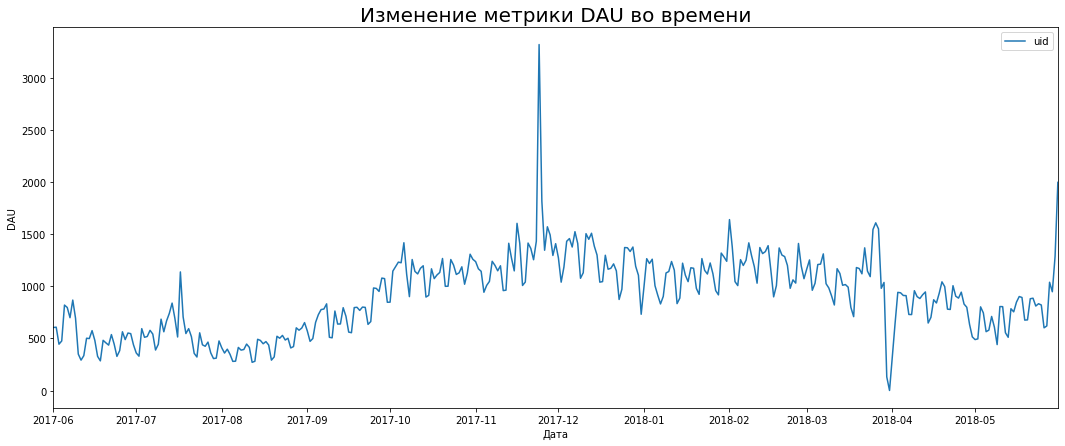

In [15]:
dau = visits.groupby('start_date').agg({'uid': 'nunique'})
dau.plot(figsize = (18,7));
plt.title('Изменение метрики DAU во времени', fontsize=20)
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.show()

In [16]:
dau.sort_values(ascending = False, by = 'uid')

,uid
start_date,
2017-11-24,3319
2018-05-31,1997
2017-11-25,1817
2018-02-01,1640
2018-03-26,1609
...,...
2017-08-13,281
2017-08-05,280
2017-08-12,271


In [17]:
dau.mean()

uid    907.991758
dtype: float64

<div class="alert alert-info">
<b>Вывод</b>: 
<div> - среднее значение DAU - 907 человек
<div> - самое большое количество уникальных пользователей в день (3319) было 2017-11-24
<div> - самое маленькое количество уникальных пользователей в день (1) было 2018-03-31 (возможно, были какие-то проблемы с сайтом)
<div> - начиная с сентября 2017 года наблюдается плавное увеличение количества пользователей в день, с апреля 2018 начался небольшой спад.

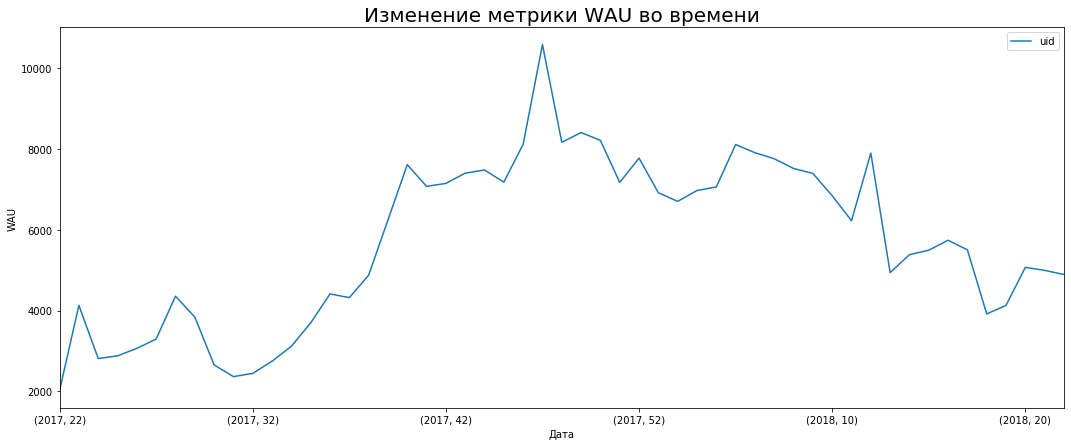

In [18]:
wau = visits.groupby(['start_year', 'start_week']).agg({'uid': 'nunique'})
wau.plot(figsize = (18,7));
plt.title('Изменение метрики WAU во времени', fontsize=20)
plt.xlabel('Дата')
plt.ylabel('WAU')
plt.show()

In [19]:
wau.sort_values(ascending = False, by = 'uid').tail()

uid
start_year start_week      
2017       33          2746
           30          2655
           32          2444
           31          2364
           22          2021

In [20]:
wau.mean()

uid    5716.245283
dtype: float64

<div class="alert alert-info">
<b>Вывод</b>: 
<div> - среднее значение WAU - 5716 человек
<div> - самое большое количество уникальных пользователей в неделю (10586) было на 47 неделе 2017 года, на этой неделе был день с самым большим количеством пользователей (2017-11-24).
<div> - самое маленькое количество уникальных пользователей в неделю (2021) было на 22 неделе 2017 года. В эту неделю не входит день с самым маленьким количеством посетителей, что ещё раз указывает на то, что это был какой-то форс мажор, а не закономерность.
<div> - ближе к 40 неделе 2017 года наблюдается увеличение количества пользователей в неделю, которое держится до 12 недели 2018 года, а далее происходит спад.

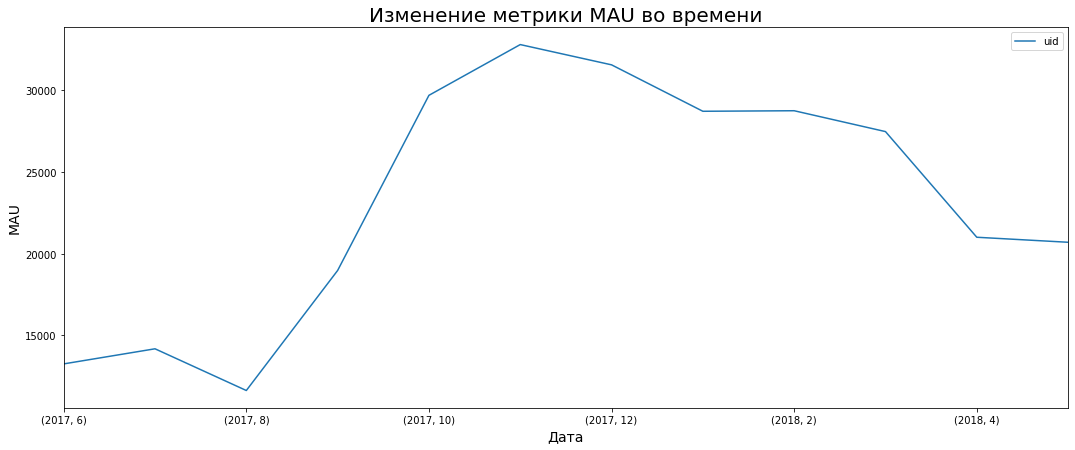

In [21]:
mau = visits.groupby(['start_year', 'start_month']).agg({'uid': 'nunique'})
mau.plot(figsize = (18,7));
plt.title('Изменение метрики MAU во времени', fontsize=20)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('MAU', fontsize=14)
plt.show()

In [22]:
mau.sort_values(ascending = False, by = 'uid')

uid
start_year start_month       
2017       11           32797
           12           31557
           10           29692
2018       2            28749
           1            28716
           3            27473
           4            21008
           5            20701
2017       9            18975
           7            14183
           6            13259
           8            11631

In [23]:
mau.mean()

uid    23228.416667
dtype: float64

<div class="alert alert-info">
<b>Вывод</b>: 
<div> - среднее значение MAU - 23228 человек
<div> - самое большое количество уникальных пользователей в месяц (31557) было в ноябре 2017 года
<div> - самое маленькое количество уникальных пользователей в неделю (11631) было в августе 2017 года. 
<div> - с сентября 2017 года наблюдается увеличение количества пользователей в месяц, пик приходится на ноябрь 2017 года, далее происходит плавный спад, и более резкое падение в марте 2018 года.</div>
    
<br>
    
Самые высокие значения метрик DAU, WAU и MAU приходятся на один и тот же период, что говорит о какой-то закономерности. Вероятно в эти месяцы была какая-то рекламная кампания. Наиболее успешным является период с 10.2017 по 03.2018. Самое высокое количество посетителей было в ноябре 2017 года.
<div>Самые низкое значение метрики DAU не совпадает с периодом самого низкого WAU и MAU. Поэтому я считаю, что самое низкое значение DAU можно назвать исключением, вероятно, были какие-то проблемы с сайтом в этот день. Наиболее низкое количество пользователей на сайте в разрезе месяца было в августе 2017 года, в разрезе недели - 22 неделя 2017 года.

#### Cколько раз за день пользователи в среднем заходят на сайт.

In [24]:
visits_count = visits.groupby('start_date').agg({'uid': 'count'}).mean()
print('В среднем за день пользователи заходят на сайт', int(visits_count[0]), 'раз')

В среднем за день пользователи заходят на сайт 987 раз


In [25]:
visits_c = visits.groupby('start_date').agg({'uid': 'count'})

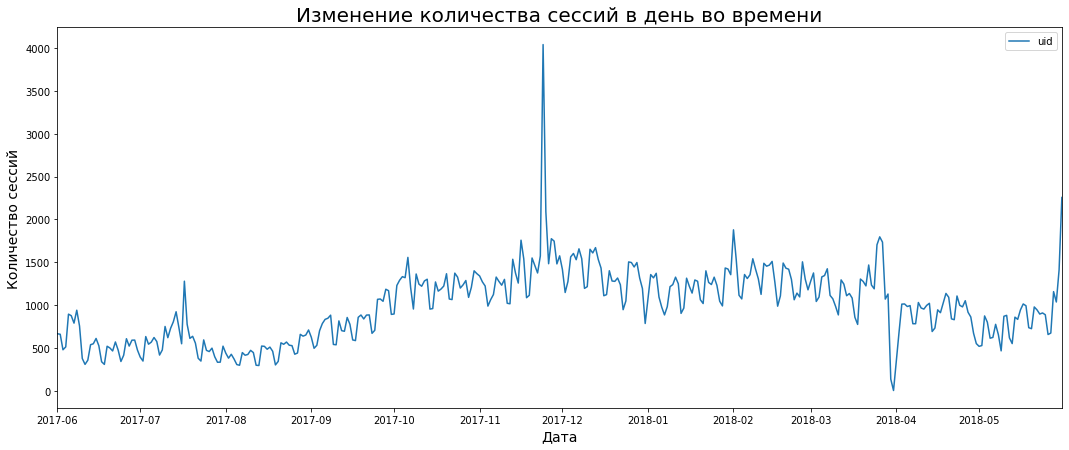

In [26]:
visits_c.plot(figsize = (18,7));
plt.title('Изменение количества сессий в день во времени', fontsize=20)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14)
plt.show()

In [27]:
visits_c.sort_values(by='uid')

,uid
start_date,
2018-03-31,1
2018-03-30,134
2017-08-13,293
2017-08-12,296
2017-08-06,296
...,...
2018-03-26,1796
2018-02-01,1878
2017-11-25,2089


In [28]:
visits_per_day = visits.groupby('start_date').agg(count=('uid', 'count'), unique=('uid', 'nunique')).reset_index()

In [29]:
visits_per_day['visits'] = (visits_per_day['count']/visits_per_day['unique']).round(2)

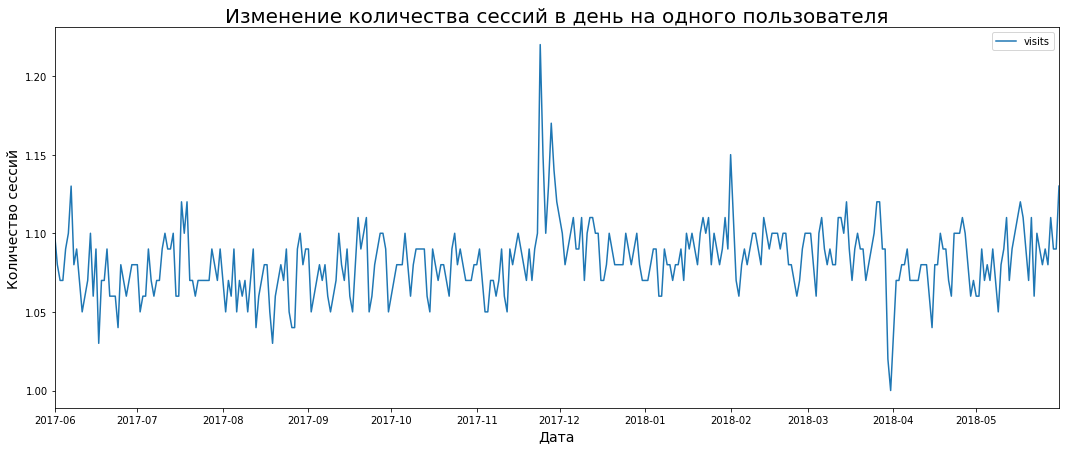

In [30]:
visits_per_day.plot(x = 'start_date', y = 'visits', figsize = (18,7));
plt.title('Изменение количества сессий в день на одного пользователя', fontsize=20)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14)
plt.show()

In [31]:
visits_per_day['visits'].mean().round(2)

1.08

In [32]:
visits_per_day.sort_values(by='visits')

,start_date,count,unique,visits
303,2018-03-31,1,1,1.00
302,2018-03-30,134,131,1.02
16,2017-06-17,337,328,1.03
79,2017-08-19,300,292,1.03
73,2017-08-13,293,281,1.04
...,...,...,...,...
181,2017-11-29,1480,1296,1.14
177,2017-11-25,2089,1817,1.15
245,2018-02-01,1878,1640,1.15
180,2017-11-28,1746,1493,1.17


<div class="alert alert-info">
<b>Вывод</b>: 
<div> - среднее количество сессий в день на одного пользователя - 1,08
<div> - самое большое количество сессий одного пользователя было 24 ноября 2017 года, в день с самым большим количеством пользователей
<div> - самое маленькое количество сессий одного пользователя было 31 марта 2018 года, в день с самым маленьким количеством пользователей (в этот день только один пользователь зашёл на сайт один раз)   

#### Сколько времени проводят пользователи на сайте. 

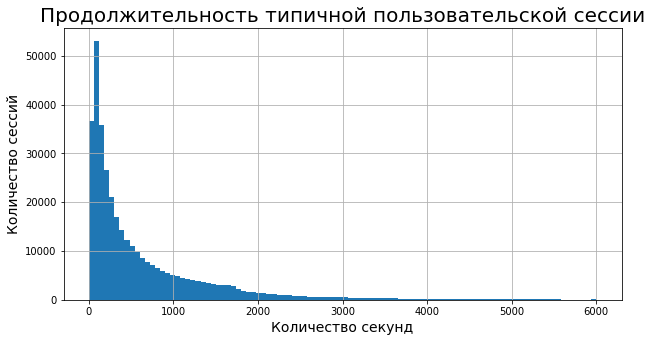

In [33]:
visits['session_len'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_len'].hist(figsize=(10,5), bins=100, range=[0, 6000]);
plt.title('Продолжительность типичной пользовательской сессии', fontsize=20)
plt.xlabel('Количество секунд', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14)
plt.show()

In [34]:
visits['session_len'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_len, dtype: float64

In [35]:
print('Средняя продолжительность пользовательской сессии',int(visits['session_len'].mode()), 'секунд')

Средняя продолжительность пользовательской сессии 60 секунд


Так как распределение не близко к нормальному, я взяла для подсчёта средней продолжительности сесиии моду.

#### Retention Rate

In [36]:
visits['start_date'] = pd.to_datetime(visits['start_date'])
first_activity_date = visits.groupby(['uid'])['start_date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['start_month'] = visits['start_date'].astype('datetime64[M]')

In [37]:
visits['cohort_lifetime'] = ((visits['start_month'] - visits['first_activity_month'])/ np.timedelta64(1, 'M')).round().astype('int') 

In [38]:
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

In [39]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_activity_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [40]:
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 

In [41]:
mean_retention = cohorts.loc[cohorts['cohort_lifetime'] == 1, 'retention'].mean()
print('Cредний Retention Rate на второй месяц «жизни» когорт '"{:.0%}".format(mean_retention))

Cредний Retention Rate на второй месяц «жизни» когорт 7%


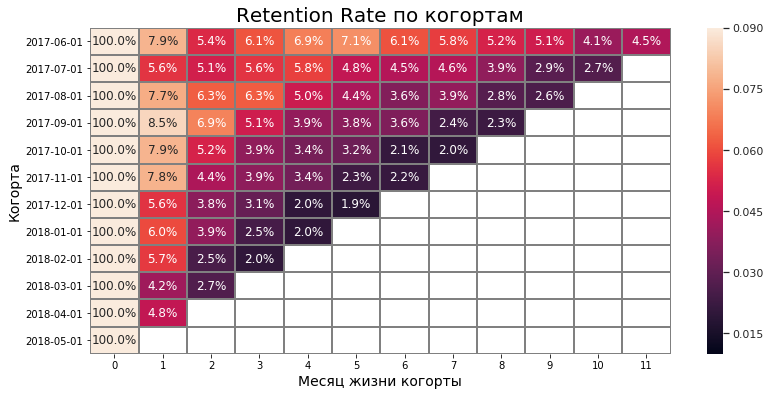

In [42]:
fig, ax = plt.subplots(figsize = (13,6))   
sns.set(style='white') 
fig = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', ax=ax, vmin=0.01, vmax=0.09)

y_dates = cohorts['first_activity_month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_yticklabels(labels=y_dates, ha='right')

sns.set(style='white')

plt.title('Retention Rate по когортам', fontsize=20)
plt.xlabel('Месяц жизни когорты', fontsize=14)
plt.ylabel('Когорта', fontsize=14)

plt.show()

<div class="alert alert-info">
<b>Вывод</b>: 
<div>Retention Rate выше у более взрослых когорот, с каждой новой когортой коэффициент удержания снижается. У первых двух когорт наблюдается небольшой рост после падения в сентябре 2017 года. Но, в целом, Retention Rate очень низкий, уже после первого месяца он составляет 4-8%. Вероятно, люди совершают покупки билетов не на регулярной основе, а по особым поводам, или в качестве подарка.

#### Вывод

<div class="alert alert-info">
1) DAU - 907 человек, WAU - 5716, MAU - 23228
<div>2) Среднее количество сессий в день на одного пользователя - 1,08
<div>3) Средняя продолжительность пользовательской сессии 60 секунд
<div>4) Retention Rate очень низкий, уже после первого месяца он составляет 4-8%. Вероятно, люди совершают покупки билетов не на регулярной основе, а по особым поводам, или в качестве подарка.

### Метрики электронной коммерции

#### Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

In [43]:
first_activity = visits.groupby(['uid'])['start_ts'].min()
first_activity.name = 'first_activity'
first_order = orders.groupby(['uid'])['buy_ts'].min()
first_order.name = 'first_order'
time_to_purchase = pd.concat([first_order,first_activity],axis=1).reset_index().dropna()

In [44]:
time_to_purchase['gap'] = (((time_to_purchase['first_order'] - time_to_purchase['first_activity']))/ np.timedelta64(1, 'm')).round().astype('int') 

In [45]:
time_to_purchase['gap'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: gap, dtype: float64

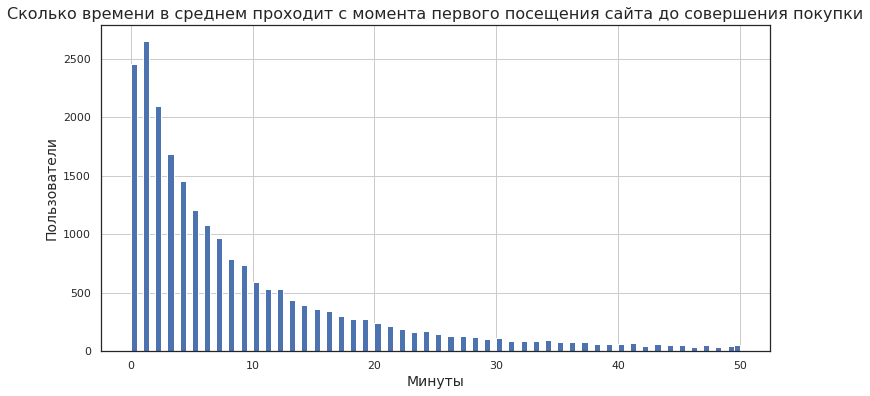

In [46]:
a = time_to_purchase['gap'].hist(figsize=(12,6), bins = 100, range =(0,50));
plt.title('Cколько времени в среднем проходит с момента первого посещения сайта до совершения покупки', fontsize=16)
plt.xlabel('Минуты', fontsize=14)
plt.ylabel('Пользователи', fontsize=14)
plt.show()

In [47]:
print('В среднем с момента первого посещения сайта до совершения покупки проходит', int(time_to_purchase['gap'].mode()), 'минута')

В среднем с момента первого посещения сайта до совершения покупки проходит 1 минута


<div class="alert alert-info">
Так как распределение не близко к нормальному, я взяла для подсчёта времени до совершения покупки моду.

#### Среднее количество покупок на одного покупателя за 6 месяцев.

In [48]:
orders['buy_month']= orders['buy_ts'].astype('datetime64[M]')
six_month = orders.loc[(orders['buy_month'] > '2017-06-01') & (orders['buy_month'] < '2017-12-01')]

In [49]:
avg_orders = (six_month['uid'].count())/(six_month['uid'].nunique())
print('Cреднее количество покупок на одного покупателя c июня по декабрь 2017 года - ', avg_orders.round(2))

Cреднее количество покупок на одного покупателя c июня по декабрь 2017 года -  1.3


In [50]:
orders['buy_ts'] = orders['buy_ts']
first_orders_date = orders.groupby(['uid'])['buy_ts'].min()
first_orders_date.name = 'first_order_date'

In [51]:
orders = orders.join(first_orders_date, on='uid')

In [52]:
orders

,buy_ts,revenue,uid,buy_month,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31 23:56:00


In [53]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [54]:
orders['cohort_lifetime'] = ((orders.loc[:,'buy_ts'] - orders.loc[:,'first_order_date'])/ np.timedelta64(1, 'M')).round().astype('int') 

In [55]:
uid_by_cohorts = orders.groupby(['first_order_month'])['uid'].nunique()

In [56]:
uid_by_cohorts.name = 'uid_by_cohorts'

In [57]:
orders=orders.join(uid_by_cohorts, on='first_order_month')

In [58]:
orders

,buy_ts,revenue,uid,buy_month,first_order_date,first_order_month,cohort_lifetime,uid_by_cohorts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01,0,2023
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01,0,2023
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01,0,2023
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01,0,2023
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01,0,2023
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31 23:50:00,2018-05-01,0,2988
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31 23:50:00,2018-05-01,0,2988
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31 23:54:00,2018-05-01,0,2988
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31 23:56:00,2018-05-01,0,2988


In [59]:
cohorts = orders.groupby(['first_order_month','cohort_lifetime']).agg({'uid':'count','uid_by_cohorts':'mean'}).reset_index()

In [60]:
cohorts['orders_qty'] = (cohorts['uid']/cohorts['uid_by_cohorts']).round(2)

In [61]:
cohorts

,first_order_month,cohort_lifetime,uid,uid_by_cohorts,orders_qty
0,2017-06-01,0,2355,2023,1.16
1,2017-06-01,1,147,2023,0.07
2,2017-06-01,2,152,2023,0.08
3,2017-06-01,3,236,2023,0.12
4,2017-06-01,4,278,2023,0.14
...,...,...,...,...,...
85,2018-04-01,1,166,2276,0.07
86,2018-04-01,2,13,2276,0.01
87,2018-05-01,0,3220,2988,1.08
88,2018-05-01,1,29,2988,0.01


In [62]:
cohorts_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='orders_qty',
    aggfunc='mean',
) 

In [63]:
pivot = cohorts_pivot.cumsum(axis=1)

In [64]:
pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2017-06-01,1.16,1.23,1.31,1.43,1.57,1.67,1.81,1.91,2.01,2.10,2.15,2.18,2.2
2017-07-01,1.14,1.19,1.25,1.30,1.34,1.37,1.41,1.44,1.47,1.48,1.50,1.51,NaN
2017-08-01,1.14,1.21,1.28,1.34,1.39,1.43,1.48,1.52,1.56,1.58,NaN,NaN,NaN
2017-09-01,1.15,1.23,1.29,1.35,1.38,1.42,1.46,1.48,1.50,1.50,NaN,NaN,NaN
2017-10-01,1.15,1.21,1.25,1.28,1.31,1.33,1.35,1.37,1.38,NaN,NaN,NaN,NaN
2017-11-01,1.21,1.27,1.32,1.36,1.39,1.41,1.43,1.43,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.15,1.21,1.26,1.30,1.32,1.34,1.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.13,1.19,1.23,1.25,1.27,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.12,1.18,1.20,1.22,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
print('Cреднее количество покупок на одного покупателя за 6 месяцев с июня 2017 по ноябрь 2017 - ', pivot[5].mean(axis=0).round(2))

Cреднее количество покупок на одного покупателя за 6 месяцев с июня 2017 по ноябрь 2017 -  1.41


<div class="alert alert-info">
<b>Вывод</b>: 
<div>Cреднее количество покупок на одного покупателя за 6 месяцев с июня 2017 по ноябрь 2018 -  <b>1.41</b>.
<div>Больше всего заказов (1.67) совершили покупатели из первой когорты.
<div>Меньше всего - из восьмой (1.27).

#### Средний чек

In [66]:
orders_copy = orders.copy()
orders_copy['buy_month'] = orders_copy['buy_month'].dt.strftime('%Y-%m')

In [67]:
avg_bill = orders_copy.groupby(['buy_month'])['revenue'].mean().round(2).reset_index()
avg_bill.rename(columns = {'revenue':'avg_bill'}, inplace = True)
avg_bill.style.applymap(
    lambda x: 'background-color : green' if x>5 else '', subset=['avg_bill'])

,buy_month,avg_bill
0,2017-06,4.06
1,2017-07,5.31
2,2017-08,4.85
3,2017-09,5.42
4,2017-10,4.93
5,2017-11,4.78
6,2017-12,5.85
7,2018-01,4.11
8,2018-02,4.84
9,2018-03,5.41


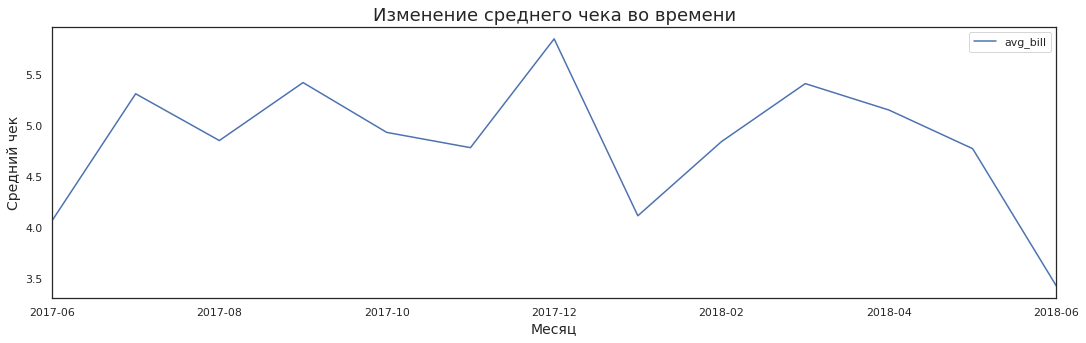

In [68]:
avg_bill.plot(x="buy_month", figsize=(18, 5));
plt.title('Изменение среднего чека во времени', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.show()

In [69]:
print('Средний чек - ', avg_bill['avg_bill'].mean().round(2))

Средний чек -  4.84


<div class="alert alert-info">
<b>Вывод</b>: 
<div>Средний чек для всего периода наблюдений -  <b>4.84</b>.
<div>Самый большой средний чек был в декабре 2017, хотя больше всего заказов было в ноябре, но вероятно, количество заказов увеличилось из-за какой-то промо акции, поэтому итоговый средний чек в ноябре ниже. Высокий средний чек в декабре можно объяснить праздничным сезоном, 
<div>Самый низкий средний чек был в январе 2018 года.

#### LTV

In [70]:
cohort_sizes = (
    orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [71]:
cohorts = (
    orders.groupby(['first_order_month', 'buy_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

In [72]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [73]:
# подсчёт валовой прибыли
margin_rate = 1
report['gp'] =  report['revenue'] * margin_rate
# расчёт возраста каждой когорты в месяцах
report['age'] = ((report['buy_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [74]:
#расчёт LTV
report['ltv'] = report['gp'] / report['n_buyers']

In [75]:
result = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round(2)

In [76]:
result_sum = result.cumsum(axis=1).round(2) 

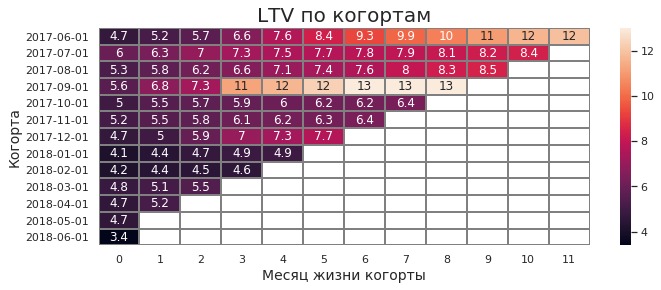

In [77]:
fig, ax = plt.subplots(figsize = (11,4))   
sns.set(style='white') 
fig = sns.heatmap(result_sum, annot=True, linewidths=1, linecolor='gray', ax=ax, vmin=3.4, vmax=13)

y_dates = report['first_order_month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_yticklabels(labels=y_dates, ha='right')

sns.set(style='white')

plt.title('LTV по когортам', fontsize=20)
plt.xlabel('Месяц жизни когорты', fontsize=14)
plt.ylabel('Когорта', fontsize=14)

plt.show()

In [78]:
print('Cредний LTV по когортам за 6 месяцев - ', report.query('first_order_month <= "2017-12-01" & age<=5').groupby('first_order_month').agg({'ltv':'sum'})['ltv'].mean().round(2))

Cредний LTV по когортам за 6 месяцев -  7.97


<div class="alert alert-info">
    <b>Вывод</b>: 
<div>Cредний LTV по когортам за 6 месяцев -  <b>7.97</b>.
<div>Самый высокий LTV на шестой месяц у сентябрьской когорты. Больше всего денег с этой когорты было получено на четвёртый месяц её жизни.
<div>Самый низкий LTV на шестой месяц у октябрьской когорты.

### Маркетинговые метрики

#### Общая сумма расходов на маркетинг

In [79]:
print('Общая сумма затрат на маркетинг', costs['costs'].sum())

Общая сумма затрат на маркетинг 329131.62


In [80]:
mktg_source = costs.groupby(['source_id'])['costs'].sum()

In [81]:
mktg_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

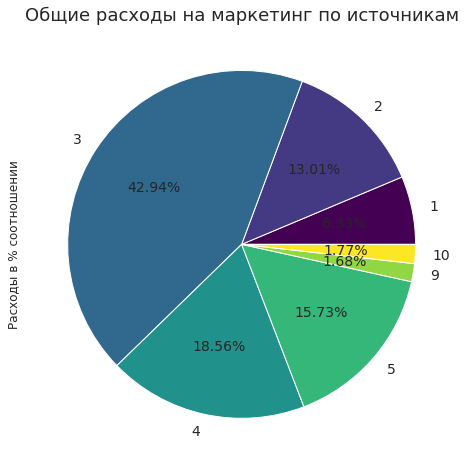

In [82]:
mktg_source.plot(y = 'costs', autopct='%1.2f%%', kind = 'pie', figsize = (10, 8), legend = False, fontsize=14, cmap="viridis")
plt.title('Общие расходы на маркетинг по источникам', fontsize=18)
plt.ylabel('Расходы в % соотношении')
plt.show()

In [83]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [84]:
mktg_date = costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').round(2)

In [85]:
mktg_date

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


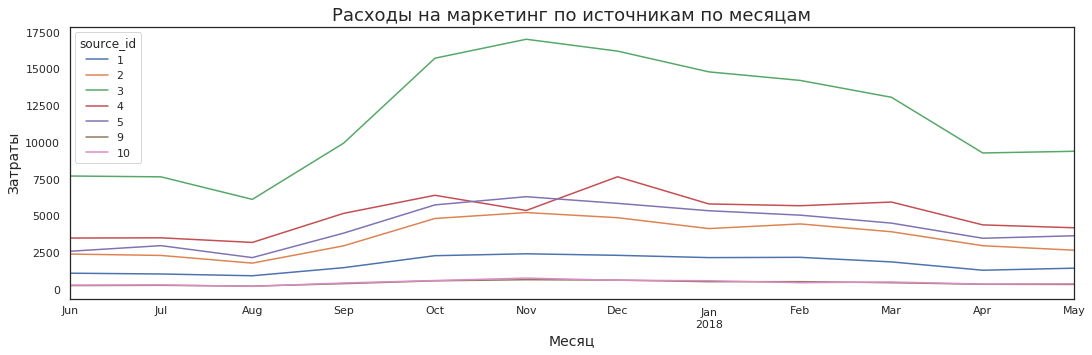

In [86]:
mktg_date.plot(kind='line', label = 'source_id', figsize=(18, 5));
plt.title('Расходы на маркетинг по источникам по месяцам', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Затраты', fontsize=14)
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-info">
<b>Вывод</b>: 
<div>Всего на маркетинг было потрачено -  <b>329131.62</b>.
<div>Больше всего было потрачено на 3 источник - <b>141321.63</b>, меньше всего на 9 и 10. По источникам 6, 7 и 8 нет данных, видимо они не использовались в этот временной промежуток.
<div>Затраты на 3 источник увеличились с сентября, пик пришелся на ноябрь, а далее начался плавный спад. По остальным источникам траты были более равномерны.

#### CAC

In [87]:
cac_total = costs['costs'].sum()/(orders['uid'].nunique())
print('Cредний CAC на одного покупателя для всего проекта', cac_total.round(2))

Cредний CAC на одного покупателя для всего проекта 9.01


In [88]:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
#monthly_costs['month'] = monthly_costs['month'].dt.strftime('%Y-%m') 

In [89]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
cac_grouped = (report_new.groupby('month').agg({'cac':'mean'})).reset_index()

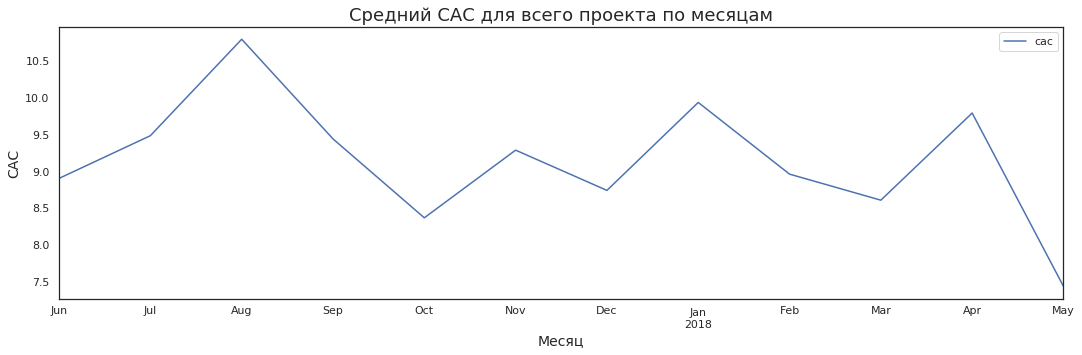

In [90]:
cac_grouped.plot(label = 'month', x='month', figsize=(18, 5));
plt.title('Средний CAC для всего проекта по месяцам', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('CAC', fontsize=14)
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-info">
<b>Вывод</b>: 
<div>Cредний CAC на одного покупателя для всего проекта -  <b>9.01</b>.
<div>Дороже всего привлечение одного клиента было в августе 2017 года, а дешевле всего в мае 2018.

In [91]:
#найдем первый источник перехода для каждого пользователя
first_source = visits.groupby('uid').agg({'source_id': 'first'})
orders = orders.merge(first_source, on='uid')

In [92]:
orders_copy = orders.copy()
orders_copy = orders_copy.rename(columns={'first_order_month': 'month'})

In [93]:
orders_pivot = orders_copy.pivot_table(index='month', columns='source_id', values='uid', aggfunc='nunique').round(2)

In [94]:
cac = (mktg_date/ orders_pivot).round(2)

In [95]:
cac

source_id,1,2,3,4,5,7,9,10
month,,,,,,,,
2017-06-01,5.54,8.96,13.47,8.43,7.11,NaN,2.77,3.61
2017-07-01,5.08,9.08,17.32,7.23,7.44,NaN,4.03,7.17
2017-08-01,6.56,11.84,21.18,9.78,6.60,NaN,2.96,6.29
2017-09-01,5.31,9.60,15.40,8.91,6.58,NaN,4.00,6.77
2017-10-01,5.66,9.73,15.22,5.81,6.21,NaN,3.50,3.28
2017-11-01,5.41,10.17,16.55,4.79,9.63,NaN,3.61,7.01
2017-12-01,5.11,9.58,14.20,5.96,7.95,NaN,3.99,8.18
2018-01-01,6.49,12.12,17.48,5.83,8.30,NaN,4.89,7.06
2018-02-01,6.39,11.81,14.64,5.49,7.55,NaN,4.75,3.82


In [96]:
cac_mean = cac.mean(axis=0)

In [97]:
cac_mean.round(2)

source_id
1      5.60
2     10.09
3     15.88
4      6.69
5      7.55
7       NaN
9      4.30
10     5.26
dtype: float64

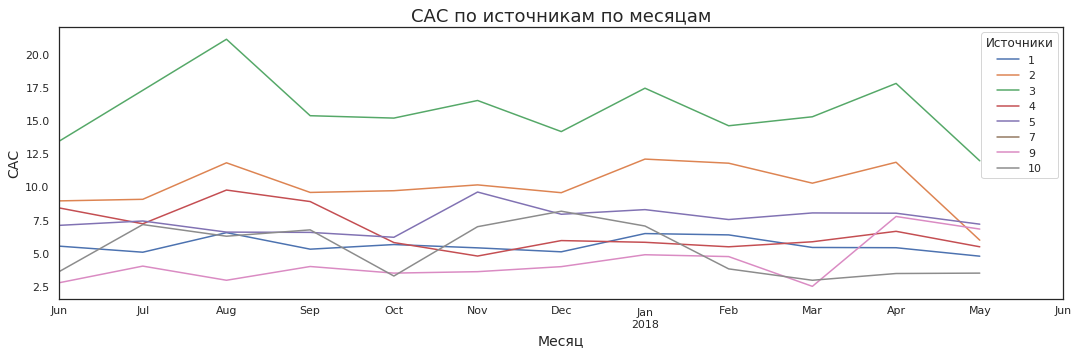

In [98]:
cac.plot( label = 'source_id', figsize=(18, 5));
plt.title('CAC по источникам по месяцам', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('CAC', fontsize=14)
plt.legend(title = "Источники")
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-info">
<b>Вывод</b>: 
<div>Самый высокий средний САС по 3 источнику -  <b>15.88</b>. Выше всего он был в августе 2017, а ниже - в мае 2018.
<div>Самый низкий средний САС у 9 источника  - <b>4.30</b>.
<div>По большинству источников наблюдается тренд на снижение САС в мае 2018 года.

#### ROMI

In [99]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [100]:
romi = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
romi = romi.cumsum(axis=1).round(2) 

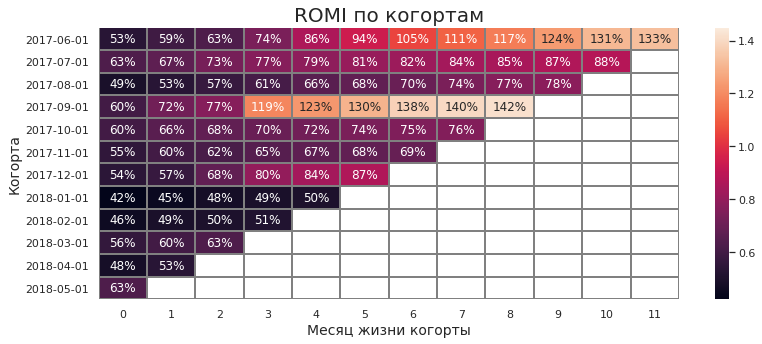

In [101]:
#общий ROMI по всему проекту
fig, ax = plt.subplots(figsize = (13,5))   
sns.set(style='white') 
fig = sns.heatmap(romi, annot=True, fmt='.0%', linewidths=1, linecolor='gray', ax=ax, vmin=0.42, vmax=1.45)
y_dates = report_new['first_order_month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_yticklabels(labels=y_dates, ha='right')
sns.set(style='white')

plt.title('ROMI по когортам', fontsize=20)
plt.xlabel('Месяц жизни когорты', fontsize=14)
plt.ylabel('Когорта', fontsize=14)

plt.show()

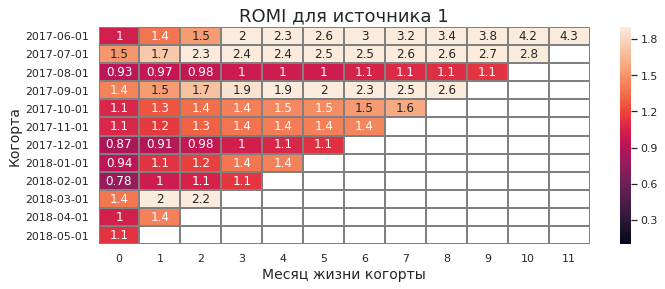

Средний ROMI
age
0     1.101002
1     1.315595
2     1.458701
3     1.512825
4     1.634864
5     1.732187
6     1.988755
7     2.199205
8     2.441268
9     2.526592
10    3.500286
11    4.287587
dtype: float64


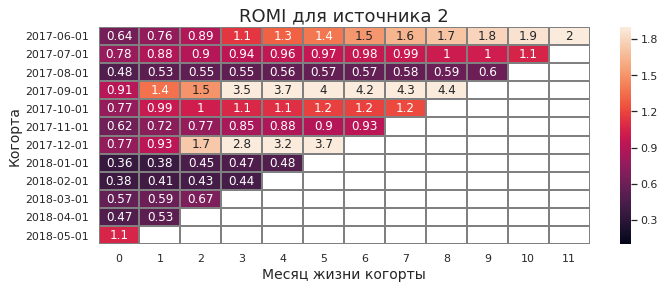

Средний ROMI
age
0     0.652748
1     0.735218
2     0.893230
3     1.308827
4     1.522734
5     1.806401
6     1.564643
7     1.748908
8     1.927182
9     1.136216
10    1.458700
11    1.958422
dtype: float64


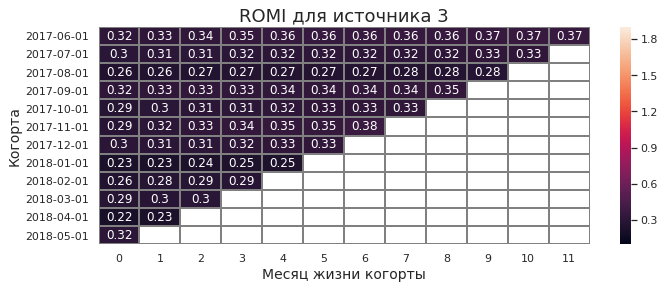

Средний ROMI
age
0     0.283503
1     0.291357
2     0.302620
3     0.309112
4     0.315985
5     0.328358
6     0.333651
7     0.326996
8     0.326738
9     0.323115
10    0.348155
11    0.372113
dtype: float64


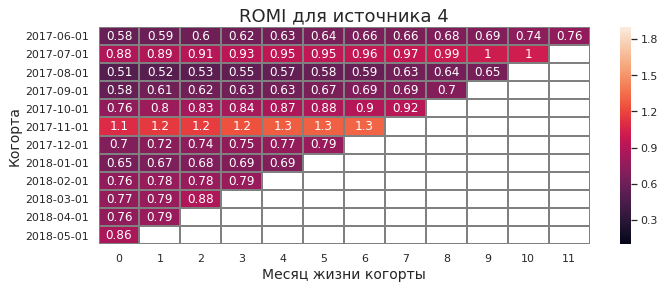

Средний ROMI
age
0     0.740604
1     0.756932
2     0.774814
3     0.784142
4     0.801080
5     0.831999
6     0.850676
7     0.776894
8     0.753973
9     0.784381
10    0.878851
11    0.755556
dtype: float64


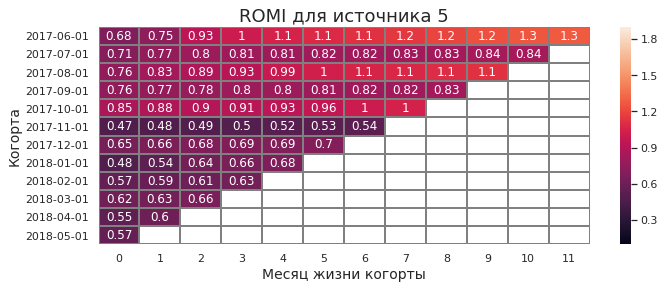

Средний ROMI
age
0     0.639231
1     0.680520
2     0.736363
3     0.769378
4     0.810989
5     0.848397
6     0.893827
7     0.985426
8     0.990485
9     1.068042
10    1.054758
11    1.279677
dtype: float64


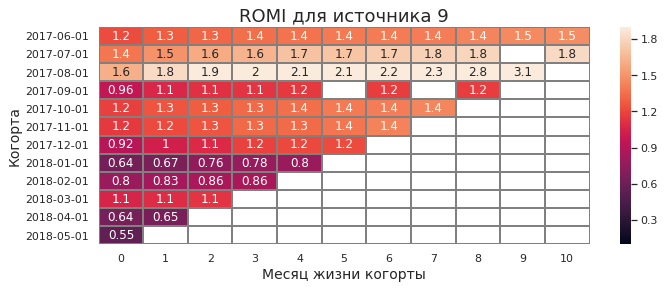

Средний ROMI
age
0     1.013361
1     1.130966
2     1.234871
3     1.292353
4     1.375192
5     1.541148
6     1.553254
7     1.732065
8     1.811118
9     2.260126
10    1.642068
dtype: float64


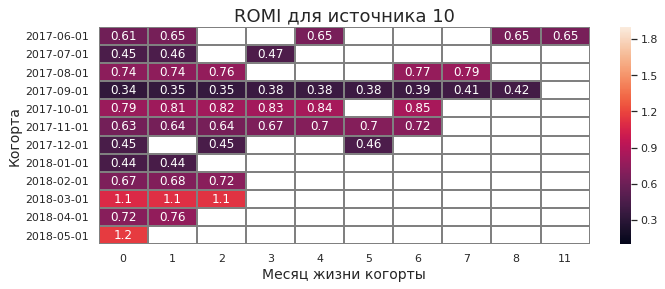

Средний ROMI
age
0     0.674280
1     0.664969
2     0.697528
3     0.585880
4     0.642299
5     0.515825
6     0.682362
7     0.598379
8     0.533667
11    0.652629
dtype: float64


In [102]:
#ROMI по источникам
for i in [ 1,  2,  3,  4,  5,  9,  10]: 
    
    orders_src = orders.loc[orders['source_id'] == i]
    costs_src = costs.loc[costs['source_id'] == i]
    
    cohort_sizes = (orders_src.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
    cohort_sizes.columns = ['first_order_month', 'n_buyers']
    
    cohorts = (orders_src.groupby(['first_order_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index())
    cohorts.columns = ['first_order_month', 'buy_month', 'revenue']
    
    report_src = pd.merge(cohort_sizes, cohorts, on='first_order_month')
    report_src['age'] = ((report_src['buy_month'] - report_src['first_order_month']) 
                    / np.timedelta64(1, 'M')).round().astype('int')
    report_src['ltv'] = report_src['revenue'] / report_src['n_buyers']
    
    monthly_costs = costs_src.groupby('month').sum().reset_index()
    monthly_costs['month'] = pd.to_datetime(monthly_costs['month'])
    
    report_new = pd.merge(report_src, monthly_costs, left_on='buy_month', right_on='month')
    report_new['cac'] = report_new['costs'] / report_new['n_buyers']
    report_new['romi'] = report_new['ltv'] / report_new['cac']

    output = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)
        
    fig, ax = plt.subplots(figsize = (11,4))   
    sns.set(style='white') 
    fig = sns.heatmap(output, annot=True, linewidths=1, linecolor='gray', ax=ax, vmin=0.1, vmax=1.9)
    y_dates = cohorts['first_order_month'].dt.strftime('%Y-%m-%d').sort_values().unique()
    ax.set_yticklabels(labels=y_dates, ha='right')
    sns.set(style='white')
    plt.title('ROMI для источника '+ str(i), fontsize = 18)
    plt.xlabel('Месяц жизни когорты', fontsize=14)
    plt.ylabel('Когорта', fontsize=14)
    plt.show()
    
    print('Средний ROMI')
    print(output.mean(axis=0)) 

<div class="alert alert-info">
<b>Вывод</b>: 
<div>Из расчёта общего ROMI видно, что окупились только две когорты - 1 и 4. Первая когорта окупилась на 7 месяц, четвёртая на 4 месяц.
    
<div>
<br>
Расчёт ROMI по источникам показал, что первый источник окупается наиболее быстро. 8 из 12 когорт окупились уже на первый месяц, лучше всего первый источник сработал для первой когорты. Второй источник наиболее хорошо сработал для четвёртой и 7 когорты. Третий источник оказался менее привлекательным, ниодна когорта не окупилась. Четвёртый источник окупился для двух когорт. Пятый источник окупился на 10 месяц, особенно хорошо сработал для трёх когорт. Девятый источник тоже можно назвать успешным, он окупился в первый месяц, в разрезе когорт - окупился для 8 когорт на текущий момент. Десятый источник хорошо сработал для последних когорт, но в итоге, так и не окупился.
    

## Выводы и рекомендации

### Источники трафика, на которые маркетологам стоит делать упор.

Я бы рекомендовала делать упор на источники трафика под номером 1, 2 и 9, т.к. по ним самый высокий ROMI. Эти источники окупились на 4 месяц, остальные - нет.

|Источник|ROMI на 4 месяц|Расходы на маркетинг|CAC|
|:----|:----|:----|:----|
|1|1.51|20833.27|5.31|
|2|1.31|42806.04|9.60|
|9|1.29|5517.49|4.00|

Источник 1 окупается при относительно невысоких затратах на маркетинг. На текущий момент все когорты уже окупились, в общем источник окупился с первого месяца.
<br>Источник 2 окупается не во всех когортах, при этом затраты на маркетинг были выше, чем для 1 источника.
<br>Источник 9 пока не окупился в 4 когортах, но затраты на этот источник были минимальными, поэтому здесь самая низкая стоимость привлечения клиента. Возможно, с увеличением бюджета этот показатель улучшится.

<div class="alert alert-info">
По итогам когортного анализа не окупились источники под номерами 3, 4 и 10:
    
|Источник|ROMI на 4 месяц|Расходы на маркетинг|
|:----|:----|:----|
|3|0.31|141321.63|
|4|0.78|61073.60|
|10|0.59|5822.49|

<br>Хуже всего дела обстоят с 3 источником, в него была вложено самая большая часть маркетингового бюджета. Сейчас определённо стоит пересмотреть подход к инвестированию в этот источник. Возможно, за счёт него и можно привлечь пользователей, но с увеличением трат, количество пользователей не растёт так, как изначально предполагали. Сейчас нужно либо перестать инвестировать, либо хотя бы уменьшить затраты.
<br>С 10-м источником противоположная ситуация, сюда мы практически ничего не инвестировали. Можно увеличить бюджет и посмотреть будет ли положительная динамика по увеличению покупок, если нет - то от этого источника стоит отказаться.

### Выводы после подсчёта метрик

**Продуктовые метрики**

1) DAU, WAU и MAU.

**DAU** -  907 человек
<br>Самое большое количество уникальных пользователей в день (3319) было 2017-11-24.
<br>**WAU** -  5716 человек
<br>Самое большое количество уникальных пользователей в неделю было на 47 неделе 2017 года.
<br>**MAU** -  23228 человек
<br>Самое большое количество уникальных пользователей в месяц было в ноябре 2017 года. После этого месяца количество уникальных пользователей идёт на спад.

2) В среднем на сайт заходят 987 раз в день.
Больше всего заходили на сайт 2017-11-24 - 4042 раза.

3) Чаще всего средняя продолжительность пользовательской сессии составляла 60 секунд. 75% сессий были до 14 минут. Максимальная продолжительность сессии 23 часа (видимо, кто-то забыл закрыть браузер).

4) Retention Rate выше у более взрослых когорот, с каждой новой когортой коэффициент удержания снижается. Но, в целом, Retention Rate очень низкий, уже после первого месяца он составляет 4-8%. Вероятно, люди совершают покупки билетов не на регулярной основе, а по особым поводам, или в качестве подарка.

**Метрики электронной комерции**

1) Чаще всего с момента первого посещения сайта до совершения покупки проходит 1 минута. 75% заказов совершается в срок до 48 часов с момента первого посещения сайта.

2) Cреднее количество покупок на одного покупателя c июня по декабрь 2017 года -  1.3.

3) Средний чек -  4.84. Самый высокий средний чек был в декабре 2017 года - 5.85.

4) Самый высокий LTV за 6 месяцев с июня по ноябрь 2017 года был по сентябрьской когорте, эти покупатели принесли больше всего прибыли. На втором месте июньская когорта. Остальные четыре принесли меньше прибыли и были примерно на одинаковом уровне.


**Маркетинговые метрики**

1) Общая сумма затрат на маркетинг 329131.62

2) Cредний CAC на одного покупателя для всего проекта 9.01, во столько обошлось привлечение одного покупателя. Больше всего денег тратили на 2 и 3 источники. Стоимость привлечения покупателей выше всего для когорты 2017-08, а ниже всего для майской когорты.

3) После подсчёта ROMI по источникам выяснилось, что окупились только три из них: 1, 2, 5 и 9. Самый прибыльный первый, именно в него стоит продолжить вкладываться. В то время как в третий источник, в который вкладывали больше всего денег нужно либо перестать инвестировать, либо хотя бы уменьшить затраты.

### Итоги когортного анализа

По итогам когортного анализа выяснилось, что на данный момент окупилась только когорты 1 и 4. Быстрее всего окупилась 4 когорта - на четвёртый месяц.
В разрезе источников окупились 1, 2, 5 и 9. Самый прибыльный первый.